In [71]:
from google.colab import drive
drive.mount('../content/drive')

Drive already mounted at ../content/drive; to attempt to forcibly remount, call drive.mount("../content/drive", force_remount=True).


In [0]:
from numpy import array,random,transpose,dot,subtract,zeros,ones,reshape
import os
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import numpy as np
from sklearn.metrics import confusion_matrix
from scipy import stats

In [73]:
os.listdir('../content/drive/My Drive/Mesterseges')

['pizza', 'umbrella']

In [0]:
data_path = '../content/drive/My Drive/Mesterseges'

In [0]:
def gradf(x):
  return sigmoid(x) * (1 - sigmoid(x))

In [0]:
def v_gradf(x):
    for i in range(len(x)):
        x[i][0] = gradf(x[i][0])
    return array('f',x)

In [0]:
def sigmoid(x):
  return 1/(1 + e ** (-x))

In [0]:
def v_sigmoid(x):
    length = len(x)
    for i in range(length):
        x[i][0] = sigmoid(x[i][0])
    return array('f',x)

In [0]:
def stop(E,epoch):
  if epoch > 10000:
    return true
  if E < 0.01:
    return true
  return false
    

In [0]:
def mul(v1, v2, ln):
    v3 = zeros((ln, 1))
    for i in range(ln):
        v3[i][0] = v1[i][0]*v2[i][0]
    return v3

In [0]:
def Predict(x,f,w):
  y = zeros((len(x), len(w)))
  for i in range(len(x)):
    y[i][0]=f[x[i][0]*w]

In [0]:
def OfflineLearning(x, d , f, gradf, lr, stop):
  n = len(x[0])
  a = len(d,2)
  w = random.randn(n,a)
  epoch = 0
  while True:
    v = x * w
    y = f(v)
    e = subtract(y, d)
    g = transpose(x)
    m = mul(e, v_gradf(v), 74)
    g = g.dot(mul(e, v_gradf(v), 74))
    w = subtract(w,(lr*g))
    E = 0
    for i in range(1,e):
      E += i**2
    if stop(E, epoch):
      break
    epoch = epoch + 1
  return w, E

In [0]:
def loadFolder (folder):
  files = os.listdir(folder)
  N = len(files)
  img1 = []
  for i in range(N):
    p = folder + '/' + files[i]
    x = Image.open(p)
    x = x.resize((64,64),PIL.Image.ANTIALIAS)
    plt.imshow(x)
    img1.append(x)
  return img1,N

In [0]:
def load(trainTestRatio):
  img0,N0 = loadFolder(data_path+'/pizza')
  img1,N1 = loadFolder(data_path+'/umbrella')
  N = N0 + N1
  img=[[img0],[img1]]
  p = np.random.permutation(N)
  d = [[np.zeros((N0,1))],[np.ones((N1,1))]]
  #d = d(p)
  #X = stats.zscore(img[p][:])
  n = round(N * trainTestRatio)
  xTrain = X[1:n][:]
  xTest = X[n+1:end][:]
  dTrain = d[1:n]
  dTest = d[n+1:end]
  imgTest = img[p[n+1:end]][:]
  return xTrain,xTest,dTrain,dTest,imgTest
 

([<PIL.Image.Image image mode=RGB size=64x64 at 0x7F6860B862B0>,
  <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6860B9EE48>,
  <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6860BAB198>,
  <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6860BAB4A8>,
  <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6860BAB7B8>,
  <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6860BABAC8>,
  <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6860B9EB70>,
  <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6860B92518>,
  <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6860BABDA0>,
  <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6860B350B8>,
  <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6860B35390>,
  <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6860B35668>,
  <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6860B35940>,
  <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6860B35C18>,
  <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6860B35EB8>,
  <PIL.Image.Image image 

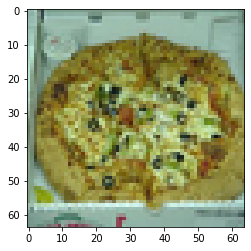

In [105]:
loadFolder(data_path+'/pizza')

In [0]:
def Draw(predicted,actual,x):
  c =['pizza','umbrella']
  nrows = 6
  ncols = 6
  predicted = predicted +1
  actual = actual +1
  for i in range(nrows):
    for j in range(ncols):
      k = (i-1)*ncols + j
      img = np.uint8(reshape(x[k,:],64,64))
      plt.imshow(img)
      plt.xlabel(c(predicted(k)))
  confusion_matrix(c(actual), c(predicted))

In [0]:
def pizzaVsUmbrella():
  trainTestRatio = 0.5
  lr = 0.0005
  xTrain,xTest,dTrain,dTest,imgTest=load(trainTestRatio)
  w,E = OfflineLearning(xTrain,dTrain,gradf,lr,stop)
  y = Predict(xTest,f,w)

  Draw(y,dTest,imgTest)
  

TypeError: ignored

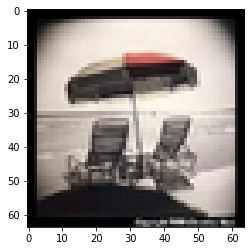

In [108]:
pizzaVsUmbrella()